# 13. Principal Component Analysis (PCA)
**Author**: Your Name  
**Date**: June 9, 2025  

## Introduction

Principal Component Analysis (PCA) is an unsupervised learning technique for **dimensionality reduction**. It transforms the original features into a new set of **uncorrelated variables** called **principal components**, ranked by the amount of variance they explain.

- **Type**: Unsupervised Learning  
- **Task**: Dimensionality Reduction / Feature Extraction  
- **Goal**: Find a lower-dimensional representation that preserves the maximum variance.

## Theoretical Background

### 1. Core Idea
PCA finds directions (principal components) along which the data varies the most. Projecting data onto these directions reduces dimensionality with minimal loss of information.

### 2. Key Concepts
- **Variance**: Spread of a single feature  
- **Covariance**: How two features vary together  
- **Eigenvectors**: Directions of new feature space  
- **Eigenvalues**: Importance of each direction (variance explained)

### 3. PCA Steps
1. Standardise the features.
2. Compute the covariance matrix.
3. Calculate eigenvectors and eigenvalues.
4. Sort components by descending eigenvalue.
5. Select components based on desired variance explained.
6. Project data onto selected principal components.

## Pros
- Reduces dimensionality and multicollinearity
- Useful for visualisation
- Speeds up learning algorithms
- Removes noise

## Cons
- Loss of interpretability
- Assumes linearity
- Requires feature scaling
- Some information loss

## Use Cases
- Visualising high-dimensional data
- Preprocessing before ML
- Noise reduction
- Image compression
- Feature extraction in bioinformatics and finance


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

sns.set_style('whitegrid')


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=iris.feature_names)

print("Original Data Shape:", X_df.shape)
print("\nFirst 5 rows:\n", X_df.head())


Original Data Shape: (150, 4)

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

print("\nFirst 5 rows of scaled data:\n", X_scaled_df.head())



First 5 rows of scaled data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [4]:
# Fit PCA with all components
pca = PCA(n_components=None, random_state=42)
pca.fit(X_scaled_df)

print("\nPCA model fitted.")



PCA model fitted.


In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nCumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"  Up to PC{i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")



Explained Variance Ratio:
  PC1: 0.7296 (72.96%)
  PC2: 0.2285 (22.85%)
  PC3: 0.0367 (3.67%)
  PC4: 0.0052 (0.52%)

Cumulative Explained Variance:
  Up to PC1: 0.7296 (72.96%)
  Up to PC2: 0.9581 (95.81%)
  Up to PC3: 0.9948 (99.48%)
  Up to PC4: 1.0000 (100.00%)


In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nCumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"  Up to PC{i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")



Explained Variance Ratio:
  PC1: 0.7296 (72.96%)
  PC2: 0.2285 (22.85%)
  PC3: 0.0367 (3.67%)
  PC4: 0.0052 (0.52%)

Cumulative Explained Variance:
  Up to PC1: 0.7296 (72.96%)
  Up to PC2: 0.9581 (95.81%)
  Up to PC3: 0.9948 (99.48%)
  Up to PC4: 1.0000 (100.00%)


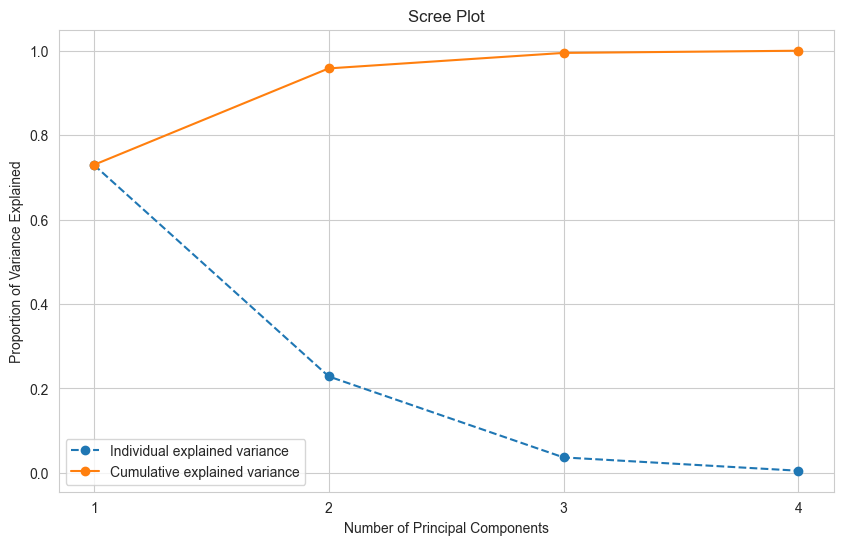

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()


### Interpretation:
The "elbow" occurs at **k = 2**, confirming that 2 components are optimal.


In [8]:
pca_2c = PCA(n_components=2, random_state=42)
X_pca = pca_2c.fit_transform(X_scaled_df)

pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

print("\nData transformed to 2 Principal Components.")
print("New Shape:", pca_df.shape)
print("\nFirst 5 rows:\n", pca_df.head())



Data transformed to 2 Principal Components.
New Shape: (150, 3)

First 5 rows:
    Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


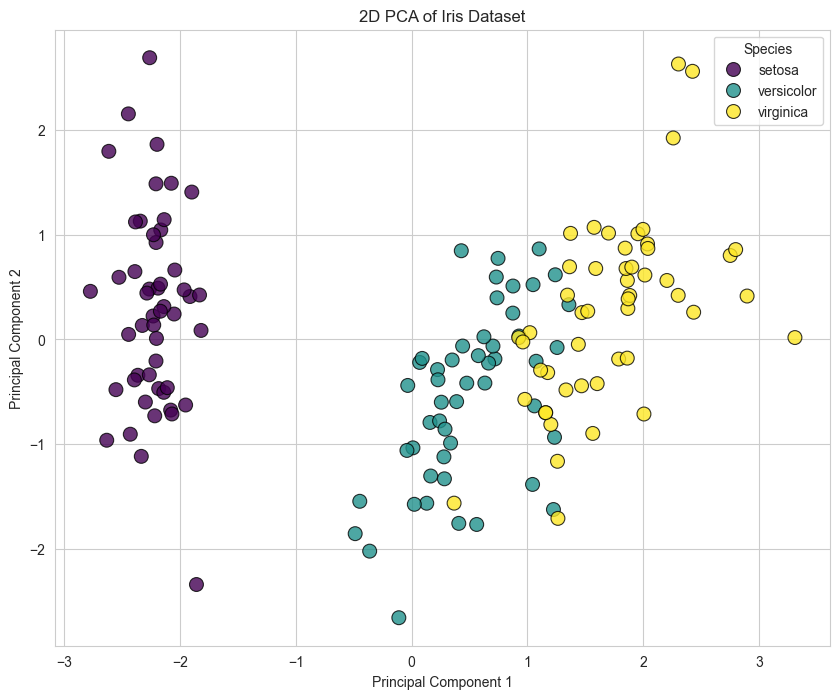

In [9]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Target',
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='k'
)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, target_names, title='Species')

plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


## Conclusion & Key Takeaways

- **PCA** is an essential tool for unsupervised dimensionality reduction.
- It transforms data into new orthogonal components ranked by variance explained.
- **Scaling** is required prior to PCA.
- Use **explained variance ratio** and **scree plot** to decide how many components to retain.
- PCA is ideal for visualisation, noise reduction, and preprocessing high-dimensional data.

## Further Reading

- [Scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  
- Chapter on Unsupervised Learning – *An Introduction to Statistical Learning*  
- [StatQuest: PCA Explained (YouTube)](https://www.youtube.com/watch?v=FgakZw6K1QQ)
